In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv
/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')
df_test = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv')
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


## Data Cleaning
- unused columns
- missing values
- duplicates
- wrong inputs
- invalid datatype

#### Unused Columns
Unnamed 133 columns is noisy column all of its values are nans so it need to be dropped

In [3]:
df_train = df_train.drop(columns = 'Unnamed: 133')

In [4]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

#### Missing values
No missing values

In [5]:
df_train.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

# duplicates


In [6]:
df_train.duplicated(keep = 'first').sum()

4616

In [7]:
duplicates = df_train.loc[df_train.duplicated(),:]

In [8]:
duplicates

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [9]:
df_train_without_duplicates = df_train.drop_duplicates()
df_train_without_duplicates

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


### 41 unique disease

In [10]:
df_train_without_duplicates['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [11]:
df_train_without_duplicates['prognosis'].nunique()

41

In [12]:
df_train['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [13]:
df_train_without_duplicates['prognosis'].value_counts()

prognosis
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronchial Asthma        

# Rarity factor
#### There was an issue regarding the duplicates in disease related datasets particularly as duplicating a disease is an indicator of its rarity were the more duplicated the disease the more common it is , so removing duplicates would have made us lose the raraity information of the disease, since all the diseases in this dataset exists with equal occuerence therefore based on these values all of the diseases are of the same rarity so removing duplicates in this case is supposed to be safe and optimal

#### Wrong inputs / incorrect datatype

In [14]:
df_train_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 407
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 318.2+ KB


#### all symptoms columns are int dtype and prognosis is object dtype, so no incorrect dtypes

In [15]:
i = 0
for colname in df_train.columns:
    print(f'column no {i} -> {colname}: {df_train_without_duplicates[colname].unique()}')
    i+=1

column no 0 -> itching: [1 0]
column no 1 -> skin_rash: [1 0]
column no 2 -> nodal_skin_eruptions: [1 0]
column no 3 -> continuous_sneezing: [0 1]
column no 4 -> shivering: [0 1]
column no 5 -> chills: [0 1]
column no 6 -> joint_pain: [0 1]
column no 7 -> stomach_pain: [0 1]
column no 8 -> acidity: [0 1]
column no 9 -> ulcers_on_tongue: [0 1]
column no 10 -> muscle_wasting: [0 1]
column no 11 -> vomiting: [0 1]
column no 12 -> burning_micturition: [0 1]
column no 13 -> spotting_ urination: [0 1]
column no 14 -> fatigue: [0 1]
column no 15 -> weight_gain: [0 1]
column no 16 -> anxiety: [0 1]
column no 17 -> cold_hands_and_feets: [0 1]
column no 18 -> mood_swings: [0 1]
column no 19 -> weight_loss: [0 1]
column no 20 -> restlessness: [0 1]
column no 21 -> lethargy: [0 1]
column no 22 -> patches_in_throat: [0 1]
column no 23 -> irregular_sugar_level: [0 1]
column no 24 -> cough: [0 1]
column no 25 -> high_fever: [0 1]
column no 26 -> sunken_eyes: [0 1]
column no 27 -> breathlessness: [0 1

In [16]:
df_train_without_duplicates['fluid_overload'].unique()

array([0])

## fluid_overload column is having 0 value for all the diseases , so we can drop it as it will not add any info to the model

In [17]:
df_train_without_duplicates.drop(columns = 'fluid_overload',inplace = True)

/tmp/ipykernel_36/1108124188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_duplicates.drop(columns = 'fluid_overload',inplace = True)


# Categorical encoding
We need to encode the target feature 'prognosis' using one-hot encoding as we can't use label encoding to avoid the case were the model thinks that diseases with higher numbers will have a higher weight or higher priority than other diseases which is not correct in our case

but one-hot encoding the target would result in that we can't use this form of target except for neural networks and since we will not implement NNs for this version we should stick to label encoding the target and mitigate the risk of fake priority using models than can handle multi-classification directly without assigning any kind of priority to the target class like SVM, RF , DT, logistic regression in mutlimodal mode and Gradient boosting algorithms

In [18]:
# for NN training
df_train_without_duplicates_encoded = pd.get_dummies(df_train_without_duplicates)
df_train_without_duplicates_encoded

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
403,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
405,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
406,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Label Encoding
X = df_train_without_duplicates.copy()
X['prognosis'],_ = X['prognosis'].factorize()
X['prognosis'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [20]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,40
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,40
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,40
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,40


# Feature Engineering
- Mutual information MI

# MI
- MI between feature and target represents how much of uncertainty of target value is revealed when i know the value of that feature
- MI can capture any kind of relations between the features and the target so we can use it to select only a set of the most important features to the model to avoid overfitting it with less important or noisy features

In [21]:
from sklearn.feature_selection import mutual_info_classif
y = X.pop('prognosis')


In [22]:
mi_scores = mutual_info_classif(X,y)
mi_scores = pd.Series(mi_scores, index = X.columns, name = 'MI scores')


In [23]:
mi_scores = mi_scores.sort_values(ascending = False)

In [24]:
mi_scores

vomiting                     0.895167
fatigue                      0.802235
high_fever                   0.712278
loss_of_appetite             0.708764
nausea                       0.682571
                               ...   
weakness_of_one_body_side    0.031710
mucoid_sputum                0.031620
spotting_ urination          0.027430
patches_in_throat            0.016896
watering_from_eyes           0.000000
Name: MI scores, Length: 131, dtype: float64

### Based on mi scores we can select only the higher feature mi scores to train the model on

In [25]:
# first trial set with mi_score >= 0.5
feature_set1 = mi_scores.loc[mi_scores >= 0.5].index
feature_set1

Index(['vomiting', 'fatigue', 'high_fever', 'loss_of_appetite', 'nausea',
       'skin_rash', 'abdominal_pain', 'headache', 'chest_pain', 'joint_pain',
       'yellowish_skin', 'yellowing_of_eyes'],
      dtype='object')

# EDA

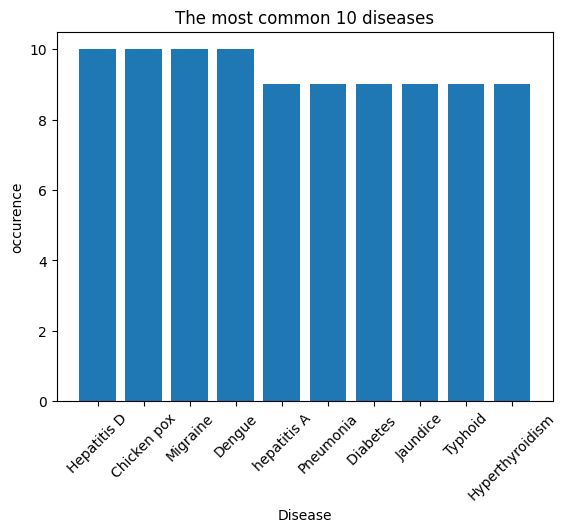

In [26]:
# most common 10 diseases
top_10_values = df_train_without_duplicates['prognosis'].value_counts().sort_values(ascending = False)[:10].values
top_10_index = df_train_without_duplicates['prognosis'].value_counts().sort_values(ascending = False).index.unique()[:10]
plt.bar(x = top_10_index, height = top_10_values)
plt.xticks(rotation = 45)
plt.title('The most common 10 diseases')
plt.xlabel('Disease')
plt.ylabel('occurence')
plt.show()

# Machine learning models
- Bernoulli Naive Bayes BNB
- Descision Tree DT
- Logistic Regression LR

## Bernoulli Naive Bayes BNB using all columns

In [27]:
df_test.drop(columns = 'fluid_overload', inplace = True)

In [28]:
X_test = df_test.copy()
y_test = X_test.pop('prognosis')
y_test,_ = y_test.factorize()

In [29]:
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train = X
y_train = y

smote = SMOTE(k_neighbors = 3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

In [30]:
BNB = BernoulliNB()


In [31]:
# with normal imbalanced data
BNB.fit(X_train,y_train)

BernoulliNB()

In [32]:
y_pred = BNB.predict(X_test)

In [33]:
# total precision, recall, f1 score 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.9881
Recall: 0.9762
F1 Score: 0.9762
Accuracy: 0.9762


In [34]:
# precision, recall, f1 score of each class

precision = precision_score(y_test, y_pred, average=None )
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred,average=None)
accuracy = accuracy_score(y_test, y_pred)

precision_scores = pd.Series(precision, index = df_train['prognosis'].unique(), name = 'precision_scores')
recall_scores = pd.Series(recall, index = df_train['prognosis'].unique(), name = 'recall_scores')
f1_scores = pd.Series(f1, index = df_train['prognosis'].unique(), name = 'F1_scores')
precision_scores

Fungal infection                           1.0
Allergy                                    1.0
GERD                                       1.0
Chronic cholestasis                        1.0
Drug Reaction                              0.5
Peptic ulcer diseae                        1.0
AIDS                                       1.0
Diabetes                                   1.0
Gastroenteritis                            1.0
Bronchial Asthma                           1.0
Hypertension                               1.0
Migraine                                   1.0
Cervical spondylosis                       1.0
Paralysis (brain hemorrhage)               1.0
Jaundice                                   1.0
Malaria                                    1.0
Chicken pox                                1.0
Dengue                                     1.0
Typhoid                                    1.0
hepatitis A                                1.0
Hepatitis B                                1.0
Hepatitis C  

In [35]:
# with upsampled data
BNB.fit(X_train_resampled,y_train_resampled)

BernoulliNB()

In [36]:
y_pred = BNB.predict(X_test)

In [37]:
# total precision, recall, f1 score 
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000


In [38]:
# precision, recall, f1 score of each class
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred, average=None )
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred,average=None)
accuracy = accuracy_score(y_test, y_pred)

precision_scores = pd.Series(precision, index = df_train['prognosis'].unique(), name = 'precision_scores')
recall_scores = pd.Series(recall, index = df_train['prognosis'].unique(), name = 'recall_scores')
f1_scores = pd.Series(f1, index = df_train['prognosis'].unique(), name = 'F1_scores')
precision_scores

Fungal infection                           1.0
Allergy                                    1.0
GERD                                       1.0
Chronic cholestasis                        1.0
Drug Reaction                              1.0
Peptic ulcer diseae                        1.0
AIDS                                       1.0
Diabetes                                   1.0
Gastroenteritis                            1.0
Bronchial Asthma                           1.0
Hypertension                               1.0
Migraine                                   1.0
Cervical spondylosis                       1.0
Paralysis (brain hemorrhage)               1.0
Jaundice                                   1.0
Malaria                                    1.0
Chicken pox                                1.0
Dengue                                     1.0
Typhoid                                    1.0
hepatitis A                                1.0
Hepatitis B                                1.0
Hepatitis C  

### AS test data is so small (only 41 row , a row for each disease) we got perfect model on this small test data although it isn't overfitting data as these metrics were on a separate test dataset , test data need to increase in order to findout if the model will keep this incredible performance or not  

## Bernoulli Naive Bayes BNB using feature_set1 of columns

In [39]:
X_train = X[list(feature_set1)]
y_train = y


In [40]:
X_test = df_test.copy()
X_test = X_test[list(feature_set1)]


In [41]:
BNB.fit(X_train,y_train)
y_pred = BNB.predict(X_test)

In [42]:
# total precision, recall, f1 score 
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.6714
Recall: 0.7381
F1 Score: 0.6857
Accuracy: 0.7381


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bernoulli Naive Bayes BNB using feature_set2 of columns
feature_set2: all features with MI score >=0.2

In [54]:
# first trial set with mi_score >= 0.2
feature_set2 = mi_scores.loc[mi_scores >= 0.2].index
feature_set2

Index(['vomiting', 'fatigue', 'high_fever', 'loss_of_appetite', 'nausea',
       'skin_rash', 'abdominal_pain', 'headache', 'chest_pain', 'joint_pain',
       'yellowish_skin', 'yellowing_of_eyes', 'excessive_hunger', 'itching',
       'malaise', 'chills', 'lethargy', 'sweating', 'dark_urine', 'phlegm',
       'weight_loss', 'cough', 'irritability', 'muscle_pain', 'constipation',
       'red_spots_over_body', 'mild_fever', 'dizziness', 'loss_of_balance',
       'swelled_lymph_nodes', 'breathlessness', 'blurred_and_distorted_vision',
       'diarrhoea', 'swelling_joints', 'family_history', 'painful_walking',
       'mood_swings', 'acidity', 'back_pain', 'burning_micturition',
       'abnormal_menstruation', 'bloody_stool', 'depression', 'restlessness',
       'muscle_weakness', 'fast_heart_rate', 'stiff_neck'],
      dtype='object')

In [55]:
X_train = X[list(feature_set2)]
y_train = y


In [56]:
X_test = df_test.copy()
X_test = X_test[list(feature_set2)]


In [57]:
BNB.fit(X_train,y_train)
y_pred = BNB.predict(X_test)

In [58]:
# total precision, recall, f1 score 
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.9643
Recall: 0.9762
F1 Score: 0.9683
Accuracy: 0.9762


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bernoulli Naive Bayes BNB using feature_set3 of columns
feature_set3: all features with MI score >=0.1

In [75]:
# first trial set with mi_score >= 0.1
feature_set3 = mi_scores.loc[mi_scores >= 0.1].index
feature_set3

Index(['vomiting', 'fatigue', 'high_fever', 'loss_of_appetite', 'nausea',
       'skin_rash', 'abdominal_pain', 'headache', 'chest_pain', 'joint_pain',
       'yellowish_skin', 'yellowing_of_eyes', 'excessive_hunger', 'itching',
       'malaise', 'chills', 'lethargy', 'sweating', 'dark_urine', 'phlegm',
       'weight_loss', 'cough', 'irritability', 'muscle_pain', 'constipation',
       'red_spots_over_body', 'mild_fever', 'dizziness', 'loss_of_balance',
       'swelled_lymph_nodes', 'breathlessness', 'blurred_and_distorted_vision',
       'diarrhoea', 'swelling_joints', 'family_history', 'painful_walking',
       'mood_swings', 'acidity', 'back_pain', 'burning_micturition',
       'abnormal_menstruation', 'bloody_stool', 'depression', 'restlessness',
       'muscle_weakness', 'fast_heart_rate', 'stiff_neck',
       'visual_disturbances', 'indigestion', 'obesity', 'increased_appetite',
       'continuous_sneezing', 'pain_in_anal_region', 'runny_nose',
       'loss_of_smell', 'puffy_fac

In [76]:
X_train = X[list(feature_set3)]
y_train = y


In [77]:
X_test = df_test.copy()
X_test = X_test[list(feature_set3)]


In [78]:
BNB.fit(X_train,y_train)
y_pred = BNB.predict(X_test)

In [79]:
# total precision, recall, f1 score 
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.9524
Recall: 0.9524
F1 Score: 0.9444
Accuracy: 0.9524


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### model ability is decreasing when including MI score features less than 0.2

In [80]:
len(feature_set3)

96

### the more we provide features with lower MI (until 0.2) , the more we get higher metrics 
the issue with MI scores is that it only captures the relationships between features and target only and ignore the relations between features themselves so a feature could have lowe MI score but it has an interaction effect where it affects on the relationships between target and a higher MI score feature so it shouldn't be discarded, which could explain why when we include more lower MI score feature the metrics are getting higher until we reached mi score of 0.2 but including any feature with lower MI further will reduce the model's ability again


## Descision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
DT_balanced = DecisionTreeClassifier(class_weight = 'balanced')
DT = DecisionTreeClassifier()

In [82]:
# all columns / imbalanced data

X_train = df_train_without_duplicates.copy()
y_train = X_train.pop('prognosis')
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
X_test = df_test.copy()
y_test = X_test.pop('prognosis')

In [85]:
y_pred = DT.predict(X_test)


In [86]:
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.9881
Recall: 0.9762
F1 Score: 0.9762
Accuracy: 0.9762


In [87]:
# using class weight to mitigate class imbalance
DT_balanced.fit(X_train,y_train)
y_pred = DT_balanced.predict(X_test)


In [88]:
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.9881
Recall: 0.9762
F1 Score: 0.9762
Accuracy: 0.9762


### DT final evaluation with / without class weight :
Precision: 0.9881
Recall: 0.9762
F1 Score: 0.9762
Accuracy: 0.9762

## DT feature importance

In [103]:
features_imp = DT.feature_importances_
features_imp = pd.Series(features_imp, index = X.columns).sort_values(ascending = False)

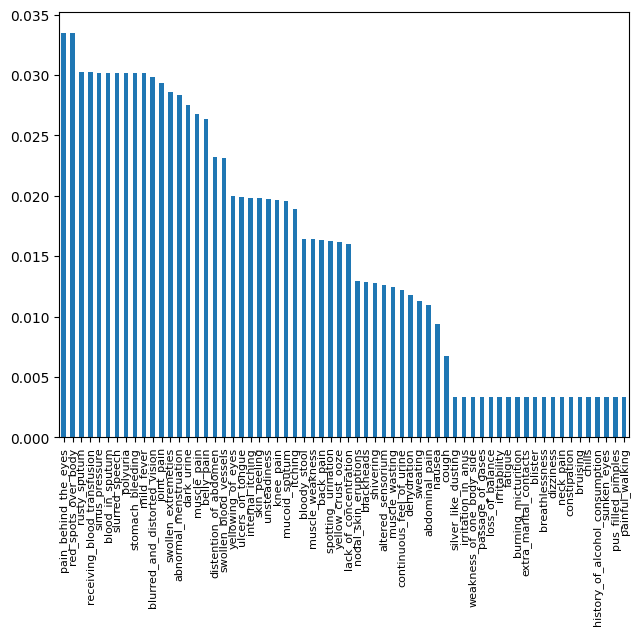

In [126]:
# plot features with importance higher than 0
plt.xticks(fontsize=8)  # Adjust the fontsize as needed
plt.tight_layout()
features_imp.loc[features_imp > 0].plot(kind = 'bar')

plt.show()

### DT Feature importance scores VS MI scores
-  looks like the overlapping featuers between the two scores are so few 

In [129]:
features_imp.index[:12]

Index(['pain_behind_the_eyes', 'red_spots_over_body', 'rusty_sputum',
       'receiving_blood_transfusion', 'sinus_pressure', 'blood_in_sputum',
       'slurred_speech', 'polyuria', 'stomach_bleeding', 'mild_fever',
       'blurred_and_distorted_vision', 'joint_pain'],
      dtype='object')

In [128]:
feature_set1

Index(['vomiting', 'fatigue', 'high_fever', 'loss_of_appetite', 'nausea',
       'skin_rash', 'abdominal_pain', 'headache', 'chest_pain', 'joint_pain',
       'yellowish_skin', 'yellowing_of_eyes'],
      dtype='object')

## DT with higher importance score features

In [151]:
features_imp_higherZero = features_imp.loc[features_imp>0]
X_train = df_train_without_duplicates[features_imp_higherZero.index]


In [152]:
X_test = df_test[features_imp_higherZero.index]

In [153]:
DT_balanced.fit(X_train,y_train)
y_pred = DT_balanced.predict(X_test)


In [154]:
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.9881
Recall: 0.9762
F1 Score: 0.9762
Accuracy: 0.9762


No difference in the performance

# Logistic Regression
- We need to use Multinomial logistic regression as we have a multiclass classification problem

In [271]:
from sklearn.linear_model import LogisticRegression

logreg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_balanced = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight = 'balanced')


In [272]:
X_train = df_train_without_duplicates.copy()
y_train = X_train.pop('prognosis')
X_test = df_test.copy()
y_test = X_test.pop('prognosis')

In [273]:
logreg_multi.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [274]:
y_pred = logreg_multi.predict(X_test)

In [275]:
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000


In [276]:
logreg_balanced.fit(X_train,y_train)
y_pred = logreg_balanced.predict(X_test)

In [277]:
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000


# same as the BNB model with the test data issue

# Disease Description and Precautions to be taken

In [312]:
df_prec = pd.read_csv('/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv')
df_desc = pd.read_csv('/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv')

In [319]:
# we need to set this disease's name as in the training data is 'Dimorphic hemmorhoids(piles)' and in description data is 'Dimorphic hemorhoids(piles)' only on m in hemmorhoids so it needs to be handled to avoid issues in printing the description 
df_desc.iloc[16,0] = 'Dimorphic hemmorhoids(piles)'

In [324]:
df_desc.set_index('Disease',inplace = True)

In [325]:
# description
predictions = list(y_pred)
for i in range(len(predictions)):
    predictions[i] = predictions[i].strip()

In [326]:
for i in range(len(predictions)):
    descrition = df_desc.loc[df_desc.index == predictions[i],'Description'][0]
    print(f'{predictions[i]}: {descrition}', end = '\n--------------------------------\n')

Fungal infection: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.
--------------------------------
Allergy: An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.
--------------------------------
GERD: Gastroesophageal reflux disease, or GERD, is a digestive disorder that affects the lower esophageal sphincter (LES), the ring of muscle between the esophagus and stomach. Many people, including pregnant women, suffer from heartburn or acid indigestion caused by GERD.
--------------------------------
Chronic cholestasis: Chronic cholestatic d

/tmp/ipykernel_36/4178184746.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  descrition = df_desc.loc[df_desc.index == predictions[i],'Description'][0]


In [327]:
# precations
df_prec.replace(float('nan'),'No Precaution',inplace = True)

In [328]:
# Because diabetes in Disease column is saved as 'Diabetes ' , and this will make a lot of trouble after if not handled here
df_prec['Disease'] = df_prec['Disease'].astype(str).str.strip()

In [329]:
df_prec.set_index('Disease',inplace = True)

In [330]:
df_prec

,Precaution_1,Precaution_2,Precaution_3,Precaution_4
Disease,,,,
Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
Allergy,apply calamine,cover area with bandage,No Precaution,use ice to compress itching
Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths


In [331]:
# Disease Description
for j in range(len(predictions)):
    precautions = df_prec.loc[(df_prec.index == predictions[j]),:].values
    print(f'Disease: {predictions[j]}')
    for i in range(4):
        print(f' precaution number {i+1}: {precautions[0][i]}')
    print('-'*50)

Disease: Fungal infection
 precaution number 1: bath twice
 precaution number 2: use detol or neem in bathing water
 precaution number 3: keep infected area dry
 precaution number 4: use clean cloths
--------------------------------------------------
Disease: Allergy
 precaution number 1: apply calamine
 precaution number 2: cover area with bandage
 precaution number 3: No Precaution
 precaution number 4: use ice to compress itching
--------------------------------------------------
Disease: GERD
 precaution number 1: avoid fatty spicy food
 precaution number 2: avoid lying down after eating
 precaution number 3: maintain healthy weight
 precaution number 4: exercise
--------------------------------------------------
Disease: Chronic cholestasis
 precaution number 1: cold baths
 precaution number 2: anti itch medicine
 precaution number 3: consult doctor
 precaution number 4: eat healthy
--------------------------------------------------
Disease: Drug Reaction
 precaution number 1: sto